In [465]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
from pprint import pprint
import requests
import gmaps
import os
import seaborn as sns

print(os.listdir())

['NY Citation Counts by Precipitation Variety.png', 'NOLA Citation Counts by Precipitation Variety.png', 'README.md', '.gitignore', 'Citation Counts by Precipitation Variety.png', '.ipynb_checkpoints', 'noaa_cdo.ipynb', 'daily_weather.csv']


In [466]:
#import NOLA weather csv file
NOLA_weather_df = pd.read_csv("daily_weather.csv")
NOLA_weather_df.head(10)

,station,date,PRCP,SNOW,TAVG,TMAX,TMIN,city
0,GHCND:USW00012916,2010-01-01,0.00,NaN,NaN,54.0,42.0,New Orleans
1,GHCND:USW00012916,2010-01-02,0.00,NaN,NaN,51.0,39.0,New Orleans
2,GHCND:USW00012916,2010-01-03,0.00,NaN,NaN,47.0,37.0,New Orleans
3,GHCND:USW00012916,2010-01-04,0.00,NaN,NaN,43.0,30.0,New Orleans
4,GHCND:USW00012916,2010-01-05,0.00,NaN,NaN,43.0,28.0,New Orleans
5,GHCND:USW00012916,2010-01-06,0.00,NaN,NaN,47.0,31.0,New Orleans
6,GHCND:USW00012916,2010-01-07,0.23,NaN,NaN,62.0,33.0,New Orleans
7,GHCND:USW00012916,2010-01-08,0.00,NaN,NaN,35.0,28.0,New Orleans
8,GHCND:USW00012916,2010-01-09,0.00,NaN,NaN,37.0,24.0,New Orleans
9,GHCND:USW00012916,2010-01-10,0.00,NaN,NaN,40.0,24.0,New Orleans


In [467]:
clean_NOLA_weather_df = NOLA_weather_df.dropna(how="any")
clean_NOLA_weather_df.count()

station    5682
date       5682
PRCP       5682
SNOW       5682
TAVG       5682
TMAX       5682
TMIN       5682
city       5682
dtype: int64

In [468]:
clean_NOLA_weather_df

,station,date,PRCP,SNOW,TAVG,TMAX,TMIN,city
1308,GHCND:USW00012916,2013-08-01,0.00,0.0,85.0,93.0,77.0,New Orleans
1309,GHCND:USW00012916,2013-08-02,0.00,0.0,86.0,95.0,77.0,New Orleans
1310,GHCND:USW00012916,2013-08-03,0.00,0.0,84.0,94.0,76.0,New Orleans
1311,GHCND:USW00012916,2013-08-04,0.00,0.0,85.0,96.0,77.0,New Orleans
1312,GHCND:USW00012916,2013-08-05,0.00,0.0,85.0,95.0,78.0,New Orleans
...,...,...,...,...,...,...,...,...
10951,GHCND:USW00094846,2019-12-27,0.00,0.0,37.0,37.0,28.0,Chicago
10952,GHCND:USW00094846,2019-12-28,0.28,0.0,34.0,48.0,27.0,Chicago
10953,GHCND:USW00094846,2019-12-29,0.93,0.0,52.0,57.0,47.0,Chicago
10954,GHCND:USW00094846,2019-12-30,0.09,0.7,38.0,47.0,27.0,Chicago


In [469]:
NOLA_df = clean_NOLA_weather_df.loc[clean_NOLA_weather_df['city'] == 'New Orleans', :]
NOLA_df 

,station,date,PRCP,SNOW,TAVG,TMAX,TMIN,city
1308,GHCND:USW00012916,2013-08-01,0.00,0.0,85.0,93.0,77.0,New Orleans
1309,GHCND:USW00012916,2013-08-02,0.00,0.0,86.0,95.0,77.0,New Orleans
1310,GHCND:USW00012916,2013-08-03,0.00,0.0,84.0,94.0,76.0,New Orleans
1311,GHCND:USW00012916,2013-08-04,0.00,0.0,85.0,96.0,77.0,New Orleans
1312,GHCND:USW00012916,2013-08-05,0.00,0.0,85.0,95.0,78.0,New Orleans
...,...,...,...,...,...,...,...,...
3647,GHCND:USW00012916,2019-12-27,0.07,0.0,66.0,71.0,63.0,New Orleans
3648,GHCND:USW00012916,2019-12-28,0.00,0.0,71.0,79.0,66.0,New Orleans
3649,GHCND:USW00012916,2019-12-29,0.01,0.0,71.0,78.0,58.0,New Orleans
3650,GHCND:USW00012916,2019-12-30,0.00,0.0,59.0,63.0,48.0,New Orleans


In [470]:
#import NOLA citation csv file
citation_day_df= pd.read_csv("../NOLA/NOLA_by_day.csv")
citation_day_df

,date,Vio_DateTime
0,2008-04-01,105
1,2008-04-02,90
2,2008-04-03,109
3,2008-04-04,121
4,2008-04-05,113
...,...,...
4173,2019-11-19,599
4174,2019-11-20,1488
4175,2019-11-21,858
4176,2019-11-22,145


In [471]:
#Number of citations per year
citation_count = citation_day_df['Vio_DateTime'].sum()
citation_count

3081600

In [472]:
# Combine the data into a single dataset
merge_table_df = pd.merge(citation_day_df, NOLA_df, on="date", how="outer")
merge_table_df.count()

date            4214
Vio_DateTime    4178
station          751
PRCP             751
SNOW             751
TAVG             751
TMAX             751
TMIN             751
city             751
dtype: int64

In [473]:
#merge NOLA citation and NOLA weather count
merge_table_df = citation_day_df.merge( NOLA_df, on="date", how="outer") 
merge_table_df.dropna()

,date,Vio_DateTime,station,PRCP,SNOW,TAVG,TMAX,TMIN,city
1872,2013-08-01,445.0,GHCND:USW00012916,0.0,0.0,85.0,93.0,77.0,New Orleans
1873,2013-08-02,440.0,GHCND:USW00012916,0.0,0.0,86.0,95.0,77.0,New Orleans
1874,2013-08-03,559.0,GHCND:USW00012916,0.0,0.0,84.0,94.0,76.0,New Orleans
1875,2013-08-04,469.0,GHCND:USW00012916,0.0,0.0,85.0,96.0,77.0,New Orleans
1876,2013-08-05,391.0,GHCND:USW00012916,0.0,0.0,85.0,95.0,78.0,New Orleans
...,...,...,...,...,...,...,...,...,...
4173,2019-11-19,599.0,GHCND:USW00012916,0.0,0.0,59.0,78.0,43.0,New Orleans
4174,2019-11-20,1488.0,GHCND:USW00012916,0.0,0.0,60.0,74.0,47.0,New Orleans
4175,2019-11-21,858.0,GHCND:USW00012916,0.0,0.0,65.0,79.0,52.0,New Orleans
4176,2019-11-22,145.0,GHCND:USW00012916,0.0,0.0,71.0,82.0,65.0,New Orleans


In [474]:
merge_table_df['New'] = [1 if merge_table_df.loc[i, 'PRCP'] > 0 else 0 for i in merge_table_df.index]
merge_table_df.dropna()

,date,Vio_DateTime,station,PRCP,SNOW,TAVG,TMAX,TMIN,city,New
1872,2013-08-01,445.0,GHCND:USW00012916,0.0,0.0,85.0,93.0,77.0,New Orleans,0
1873,2013-08-02,440.0,GHCND:USW00012916,0.0,0.0,86.0,95.0,77.0,New Orleans,0
1874,2013-08-03,559.0,GHCND:USW00012916,0.0,0.0,84.0,94.0,76.0,New Orleans,0
1875,2013-08-04,469.0,GHCND:USW00012916,0.0,0.0,85.0,96.0,77.0,New Orleans,0
1876,2013-08-05,391.0,GHCND:USW00012916,0.0,0.0,85.0,95.0,78.0,New Orleans,0
...,...,...,...,...,...,...,...,...,...,...
4173,2019-11-19,599.0,GHCND:USW00012916,0.0,0.0,59.0,78.0,43.0,New Orleans,0
4174,2019-11-20,1488.0,GHCND:USW00012916,0.0,0.0,60.0,74.0,47.0,New Orleans,0
4175,2019-11-21,858.0,GHCND:USW00012916,0.0,0.0,65.0,79.0,52.0,New Orleans,0
4176,2019-11-22,145.0,GHCND:USW00012916,0.0,0.0,71.0,82.0,65.0,New Orleans,0


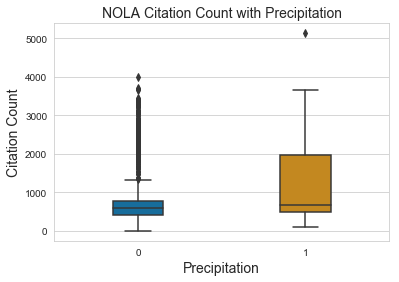

In [493]:
# Create NOLA boxplot
sns.set_style("whitegrid")
sns.boxplot(x= 'New',
            y= 'Vio_DateTime',
            data = merge_table_df, 
            width=0.3,
            palette="colorblind",
           )
plt.title('NOLA Citation Count with Precipitation', fontsize=14)
plt.ylabel('Citation Count', fontsize=14)
plt.xlabel('Precipitation', fontsize=14)
plt.savefig('NOLA Citation Counts by Precipitation Variety.png')
plt.show()

In [476]:
#NEW YORK DATA
NY_df = clean_NOLA_weather_df.loc[clean_NOLA_weather_df['city'] == 'New York', :]
NY_df 

,station,date,PRCP,SNOW,TAVG,TMAX,TMIN,city
4838,GHCND:USW00094789,2013-04-01,0.00,0.0,49.0,63.0,37.0,New York
4839,GHCND:USW00094789,2013-04-02,0.00,0.0,40.0,45.0,33.0,New York
4840,GHCND:USW00094789,2013-04-03,0.00,0.0,40.0,48.0,33.0,New York
4841,GHCND:USW00094789,2013-04-04,0.00,0.0,39.0,45.0,32.0,New York
4842,GHCND:USW00094789,2013-04-05,0.00,0.0,47.0,64.0,40.0,New York
...,...,...,...,...,...,...,...,...
7299,GHCND:USW00094789,2019-12-27,0.00,0.0,48.0,52.0,44.0,New York
7300,GHCND:USW00094789,2019-12-28,0.00,0.0,47.0,52.0,37.0,New York
7301,GHCND:USW00094789,2019-12-29,0.36,0.0,41.0,44.0,33.0,New York
7302,GHCND:USW00094789,2019-12-30,0.50,0.0,42.0,44.0,38.0,New York


In [477]:
 #import NY citation csv file
NY_citation_df= pd.read_csv("../NY Red Light Violation/New_York_DayCount.csv")
NY_citation_df

,Issue Date,State
0,2015-08-01,1
1,2016-01-20,1
2,2016-02-29,1
3,2016-04-24,2
4,2016-04-26,1
...,...,...
1311,2019-11-25,942
1312,2019-11-26,1064
1313,2019-11-27,554
1314,2019-11-28,1


In [478]:
renamed_NY_citation_df= NY_citation_df.rename(columns={"Issue Date": "date", "State":"Count"})
renamed_NY_citation_df

,date,Count
0,2015-08-01,1
1,2016-01-20,1
2,2016-02-29,1
3,2016-04-24,2
4,2016-04-26,1
...,...,...
1311,2019-11-25,942
1312,2019-11-26,1064
1313,2019-11-27,554
1314,2019-11-28,1


In [479]:
#Number of citations per year
renamed_NY_count_df = NY_citation_df.sum()
renamed_NY_count_df

Issue Date    2015-08-012016-01-202016-02-292016-04-242016-0...
State                                                   1743892
dtype: object

In [480]:
#merge NOLA citation and NOLA weather count
NY_merge_table_df = renamed_NY_citation_df.merge( NY_df, on="date", how="outer") 
NY_merge_table_df.dropna()

,date,Count,station,PRCP,SNOW,TAVG,TMAX,TMIN,city
0,2015-08-01,1.0,GHCND:USW00094789,0.00,0.0,82.0,91.0,74.0,New York
1,2016-01-20,1.0,GHCND:USW00094789,0.00,0.0,32.0,40.0,28.0,New York
2,2016-02-29,1.0,GHCND:USW00094789,0.06,0.0,48.0,62.0,42.0,New York
3,2016-04-24,2.0,GHCND:USW00094789,0.00,0.0,56.0,64.0,47.0,New York
4,2016-04-26,1.0,GHCND:USW00094789,0.04,0.0,56.0,65.0,47.0,New York
...,...,...,...,...,...,...,...,...,...
1311,2019-11-25,942.0,GHCND:USW00094789,0.00,0.0,44.0,52.0,39.0,New York
1312,2019-11-26,1064.0,GHCND:USW00094789,0.00,0.0,47.0,56.0,39.0,New York
1313,2019-11-27,554.0,GHCND:USW00094789,0.01,0.0,50.0,56.0,44.0,New York
1314,2019-11-28,1.0,GHCND:USW00094789,0.00,0.0,50.0,53.0,37.0,New York


In [481]:
NY_merge_table_df['New'] = [1 if NY_merge_table_df.loc[i, 'PRCP'] > 0 else 0 for i in NY_merge_table_df.index]
NY_merge_table_df.dropna()

,date,Count,station,PRCP,SNOW,TAVG,TMAX,TMIN,city,New
0,2015-08-01,1.0,GHCND:USW00094789,0.00,0.0,82.0,91.0,74.0,New York,0
1,2016-01-20,1.0,GHCND:USW00094789,0.00,0.0,32.0,40.0,28.0,New York,0
2,2016-02-29,1.0,GHCND:USW00094789,0.06,0.0,48.0,62.0,42.0,New York,1
3,2016-04-24,2.0,GHCND:USW00094789,0.00,0.0,56.0,64.0,47.0,New York,0
4,2016-04-26,1.0,GHCND:USW00094789,0.04,0.0,56.0,65.0,47.0,New York,1
...,...,...,...,...,...,...,...,...,...,...
1311,2019-11-25,942.0,GHCND:USW00094789,0.00,0.0,44.0,52.0,39.0,New York,0
1312,2019-11-26,1064.0,GHCND:USW00094789,0.00,0.0,47.0,56.0,39.0,New York,0
1313,2019-11-27,554.0,GHCND:USW00094789,0.01,0.0,50.0,56.0,44.0,New York,1
1314,2019-11-28,1.0,GHCND:USW00094789,0.00,0.0,50.0,53.0,37.0,New York,0


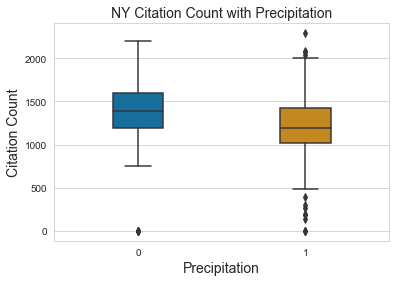

In [492]:
# Create a NY boxplot
sns.set_style("whitegrid")
sns.boxplot(x= 'New',
            y= 'Count',
            data = NY_merge_table_df, 
            width=0.3,
            palette="colorblind",
           )
plt.title('NY Citation Count with Precipitation', fontsize=14)
plt.ylabel('Citation Count', fontsize=14)
plt.xlabel('Precipitation', fontsize=14)
plt.savefig('NY Citation Counts by Precipitation Variety.png')
plt.show()

Chicago Data 

In [485]:
#Chicago weather DATA
Chicago_df = clean_NOLA_weather_df.loc[clean_NOLA_weather_df['city'] == 'Chicago', :]
Chicago_df 

,station,date,PRCP,SNOW,TAVG,TMAX,TMIN,city
8490,GHCND:USW00094846,2013-04-01,0.00,0.0,36.0,41.0,29.0,Chicago
8491,GHCND:USW00094846,2013-04-02,0.00,0.0,34.0,45.0,25.0,Chicago
8492,GHCND:USW00094846,2013-04-03,0.00,0.0,35.0,44.0,25.0,Chicago
8493,GHCND:USW00094846,2013-04-04,0.00,0.0,39.0,58.0,25.0,Chicago
8494,GHCND:USW00094846,2013-04-05,0.00,0.0,44.0,45.0,36.0,Chicago
...,...,...,...,...,...,...,...,...
10951,GHCND:USW00094846,2019-12-27,0.00,0.0,37.0,37.0,28.0,Chicago
10952,GHCND:USW00094846,2019-12-28,0.28,0.0,34.0,48.0,27.0,Chicago
10953,GHCND:USW00094846,2019-12-29,0.93,0.0,52.0,57.0,47.0,Chicago
10954,GHCND:USW00094846,2019-12-30,0.09,0.7,38.0,47.0,27.0,Chicago


In [486]:
 #import Chicago citation csv file
Chicago_citation_df= pd.read_csv("../Chicago/Chicago_DayCountAll.csv")
Chicago_citation_df

,date,Daily Total
0,2003-11-01,46
1,2003-11-02,31
2,2003-11-03,69
3,2003-11-04,57
4,2003-11-05,56
...,...,...
5293,2018-04-29,190
5294,2018-04-30,797
5295,2018-05-01,60
5296,2018-05-02,81


In [487]:
#merge Chicago citation and Chicago weather count
Chi_merge_table_df = Chicago_citation_df.merge(Chicago_df, on="date", how="outer") 
Chi_merge_table_df.dropna()

,date,Daily Total,station,PRCP,SNOW,TAVG,TMAX,TMIN,city
3439,2013-04-01,1487.0,GHCND:USW00094846,0.00,0.0,36.0,41.0,29.0,Chicago
3440,2013-04-02,1532.0,GHCND:USW00094846,0.00,0.0,34.0,45.0,25.0,Chicago
3441,2013-04-03,1586.0,GHCND:USW00094846,0.00,0.0,35.0,44.0,25.0,Chicago
3442,2013-04-04,1652.0,GHCND:USW00094846,0.00,0.0,39.0,58.0,25.0,Chicago
3443,2013-04-05,1812.0,GHCND:USW00094846,0.00,0.0,44.0,45.0,36.0,Chicago
...,...,...,...,...,...,...,...,...,...
5293,2018-04-29,190.0,GHCND:USW00094846,0.00,0.0,43.0,59.0,31.0,Chicago
5294,2018-04-30,797.0,GHCND:USW00094846,0.00,0.0,56.0,80.0,40.0,Chicago
5295,2018-05-01,60.0,GHCND:USW00094846,0.00,0.0,72.0,86.0,60.0,Chicago
5296,2018-05-02,81.0,GHCND:USW00094846,1.32,0.0,77.0,86.0,63.0,Chicago


In [488]:
#Get prep values that equal 0 and more than 0
Chi_merge_table_df['New'] = [1 if Chi_merge_table_df.loc[i, 'PRCP'] > 0 else 0 for i in Chi_merge_table_df.index]
Chi_merge_table_df.dropna()

,date,Daily Total,station,PRCP,SNOW,TAVG,TMAX,TMIN,city,New
3439,2013-04-01,1487.0,GHCND:USW00094846,0.00,0.0,36.0,41.0,29.0,Chicago,0
3440,2013-04-02,1532.0,GHCND:USW00094846,0.00,0.0,34.0,45.0,25.0,Chicago,0
3441,2013-04-03,1586.0,GHCND:USW00094846,0.00,0.0,35.0,44.0,25.0,Chicago,0
3442,2013-04-04,1652.0,GHCND:USW00094846,0.00,0.0,39.0,58.0,25.0,Chicago,0
3443,2013-04-05,1812.0,GHCND:USW00094846,0.00,0.0,44.0,45.0,36.0,Chicago,0
...,...,...,...,...,...,...,...,...,...,...
5293,2018-04-29,190.0,GHCND:USW00094846,0.00,0.0,43.0,59.0,31.0,Chicago,0
5294,2018-04-30,797.0,GHCND:USW00094846,0.00,0.0,56.0,80.0,40.0,Chicago,0
5295,2018-05-01,60.0,GHCND:USW00094846,0.00,0.0,72.0,86.0,60.0,Chicago,0
5296,2018-05-02,81.0,GHCND:USW00094846,1.32,0.0,77.0,86.0,63.0,Chicago,1


In [494]:
Chi_merge_table_df.describe()

,Daily Total,PRCP,SNOW,TAVG,TMAX,TMIN,New
count,5298.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,5905.000000
mean,2181.483012,0.117867,0.115977,51.347526,59.812247,42.601784,0.155123
std,1596.215624,0.312723,0.664172,20.172473,21.519104,19.634252,0.362052
min,1.000000,0.000000,0.000000,-15.000000,-10.000000,-23.000000,0.000000
25%,930.000000,0.000000,0.000000,36.000000,42.000000,29.000000,0.000000
50%,1742.000000,0.000000,0.000000,53.000000,62.000000,43.000000,0.000000
75%,3461.750000,0.060000,0.000000,69.000000,79.000000,60.000000,0.000000
max,8743.000000,4.190000,16.200000,87.000000,97.000000,81.000000,1.000000


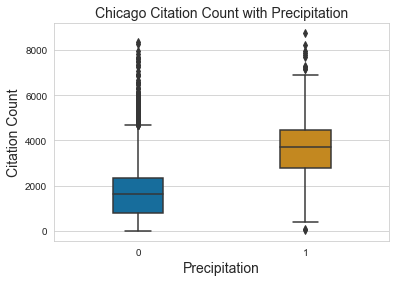

In [491]:
# Create a Chicago boxplot
sns.set_style("whitegrid")
sns.boxplot(x= 'New',
            y= 'Daily Total',
            data = Chi_merge_table_df, 
            width=0.3,
            palette="colorblind",
           )
plt.title('Chicago Citation Count with Precipitation', fontsize=14)
plt.ylabel('Citation Count', fontsize=14)
plt.xlabel('Precipitation', fontsize=14)
plt.savefig('Chicago Citation Counts by Precipitation Variety.png')
plt.show()